# Tomawac example

Dingeman test case representing waves over a deep sea.
This example shows energy transfer between frequencies.

  * data/geo_.slf contains the geometry
  * data/tom_dingeman.spe contains the spectrums
  

In [1]:
from os import path, environ
from data_manip.extraction.telemac_file import TelemacFile
from postel.plot1d import *
from postel.plot2d import *
import matplotlib.pyplot as plt


geo_file = path.join(environ['HOMETEL'], 'notebooks', 'workshop', 'data', 'geo_dinge.slf')
bnd_file = path.join(environ['HOMETEL'], 'notebooks', 'workshop', 'data', 'geo_dinge.cli')
spe_file = path.join(environ['HOMETEL'], 'notebooks', 'workshop', 'data', 'tom_dingetr2.spe')

# Exo0

Lets have a look at the mesh of the problem we are going to work with in the exercies below.

Plot the mesh with the liquid boundary.

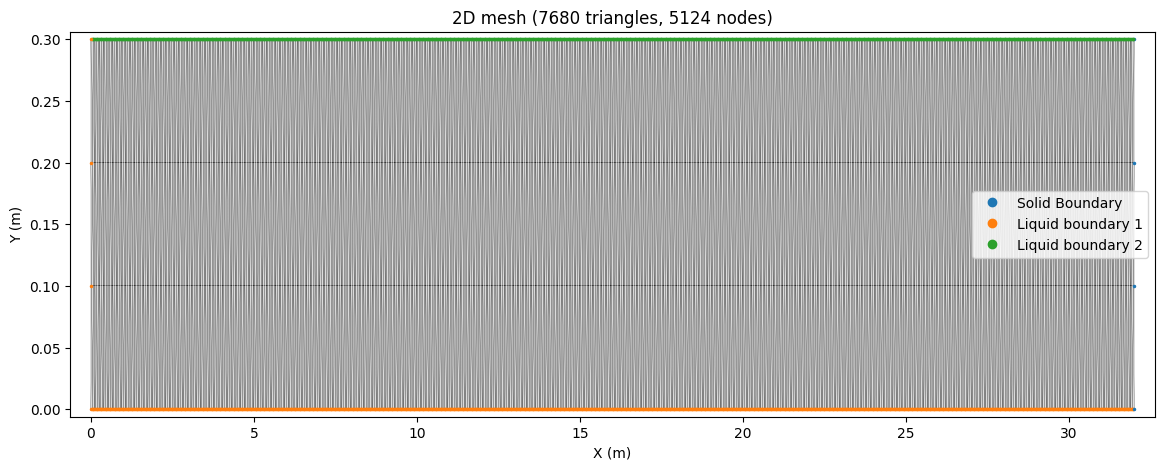

In [2]:
# Initalisaing Telemac file reader
res = TelemacFile(geo_file, bnd_file=bnd_file)

# Plot definition
fig, ax = plt.subplots(1, 1, figsize=(14, 5))
  
# Get liquid boundary info
liq_bnd_info = res.get_liq_bnd_info()

# Plot mesh
plot2d_annotate_liq_bnd(ax, res.tri, liq_bnd_info, markersize=1.5, marker='o')
plot2d_triangle_mesh(ax, res.tri, x_label='X (m)', y_label='Y (m)', color='k', linewidth=0.1)

ax.set_title('2D mesh (%d triangles, %d nodes)' % (len(res.tri.triangles), len(res.tri.x)))

plt.show()
plt.close(fig)

del res

  
# Exo1

Display value of the energy associated over spectrum crossed direction on point 3043 over a quandrangle mesh.

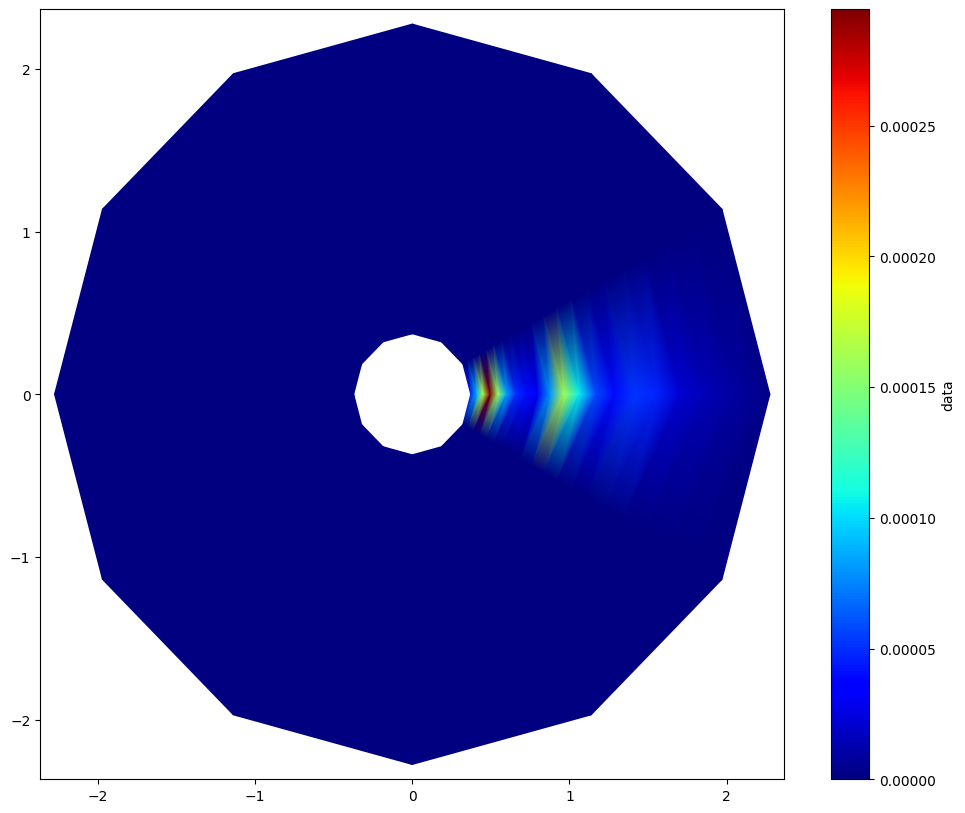

In [3]:
# Opening spectrum file
res = TelemacFile(spe_file)

# Getting mesh information
x = res.meshx
y = res.meshy

ikle = res.ikle2

# Getting name of the variable containing the spectrum for point 3043
varname = res.get_spectrum_varname(3043)

# Getting value of the spectrum
data = res.get_data_value(varname, 10)

fig, axe = plt.subplots(figsize=(12, 10))

# Ploting it
plot2d_spectrum(fig, axe, x, y, ikle, data)

plt.show()

del res

# Exo2
Display the spectrum (integrated over directions) for all the points recorded in the result file. 

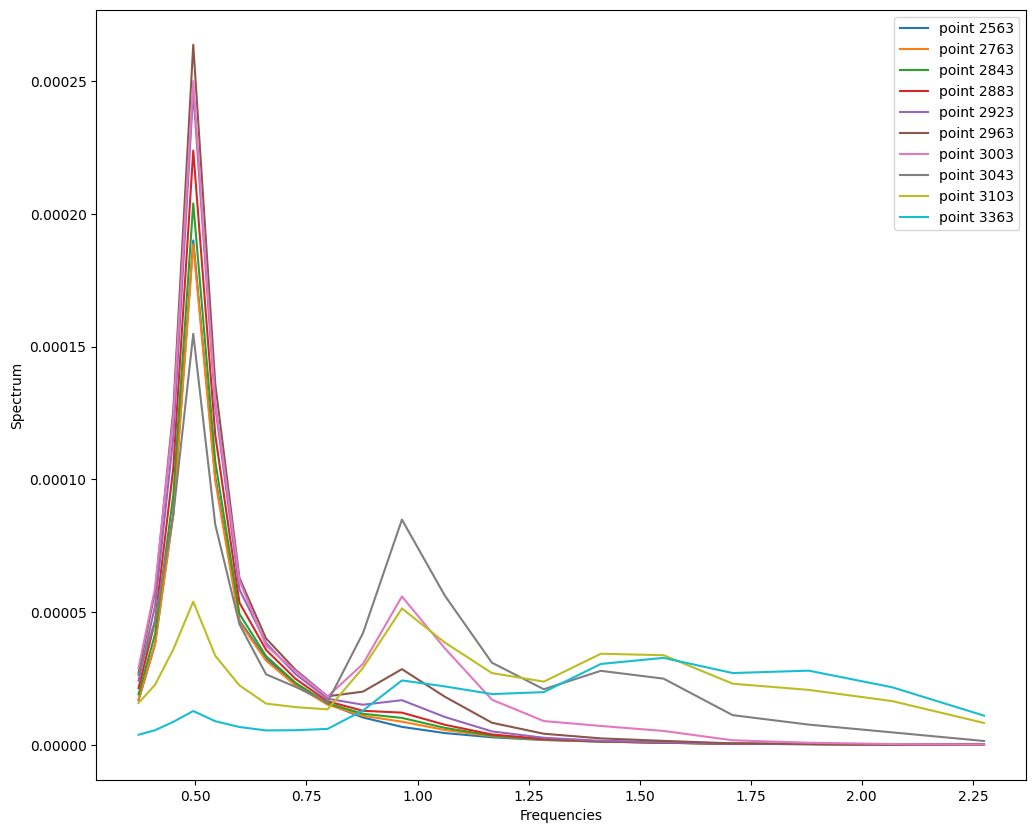

In [4]:
# Opening spectrum file
res = TelemacFile(spe_file)

# Getting list of spectrum points available in the file
points = res.get_list_spectrum_points()

# Record of extraction
record = 10

fig, axe = plt.subplots(figsize=(12, 10))

# Adding plot of spectrum for each point 
for point in points:
    # Getting list of frequencies and spectrum value
    freq, spectrum = res.get_spectrum(point, record)
    # Plotting it
    plot1d(axe, freq, spectrum, plot_label='point {:04d}'.format(point), x_label='Frequencies', y_label='Spectrum')

axe.legend()

plt.show()

del res

# Exo3

Display the energy over directions (integrated over frequencies).

What can we conclude from the graph ?

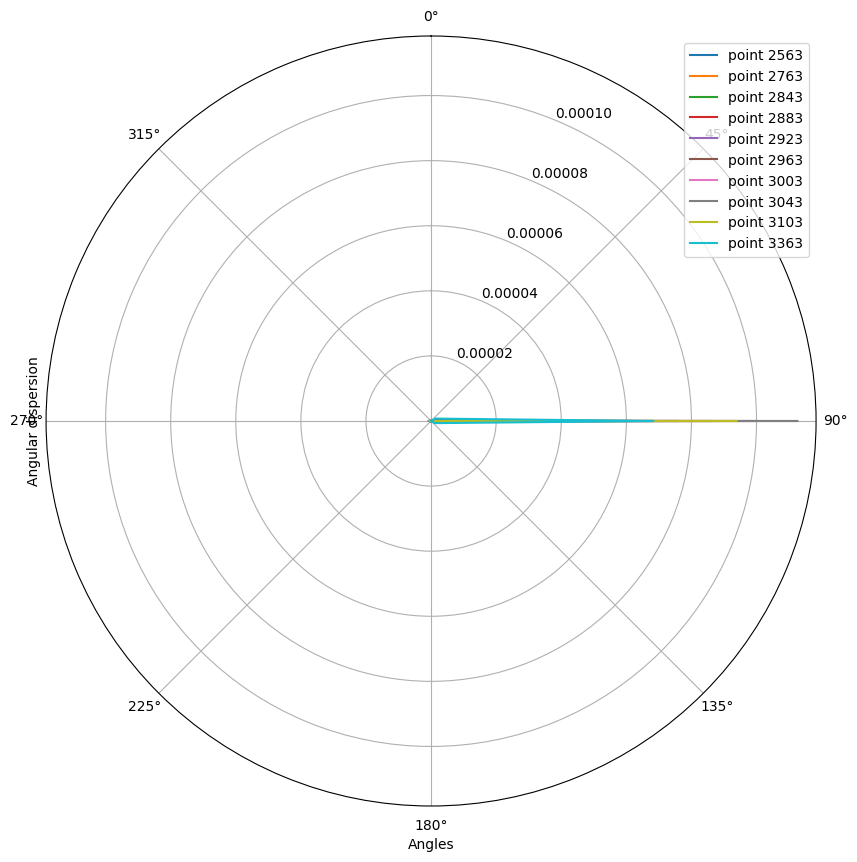

In [5]:
# Opening spectrum file
res = TelemacFile(spe_file)

# Getting list of spectrum points available in the file
points = res.get_list_spectrum_points()

record = 10

fig, axe = plt.subplots(figsize=(12, 10), subplot_kw={'projection': 'polar'})

# Adding plot of spectrum for each point 
for point in points:
    # Getting list of frequencies and spectrum value
    theta, disp = res.get_angular_dispersion(point, record, radian=True)

    plot1d(axe, theta, disp, 
           plot_label='point {:04d}'.format(point), 
           x_label='Angles', 
           y_label='Angular dispersion')
    # Setting zero location to the north
    axe.set_theta_zero_location("N") 
    # Setting angles counter-clockwise
    axe.set_theta_direction(-1)

axe.legend()

plt.show()

del res